In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

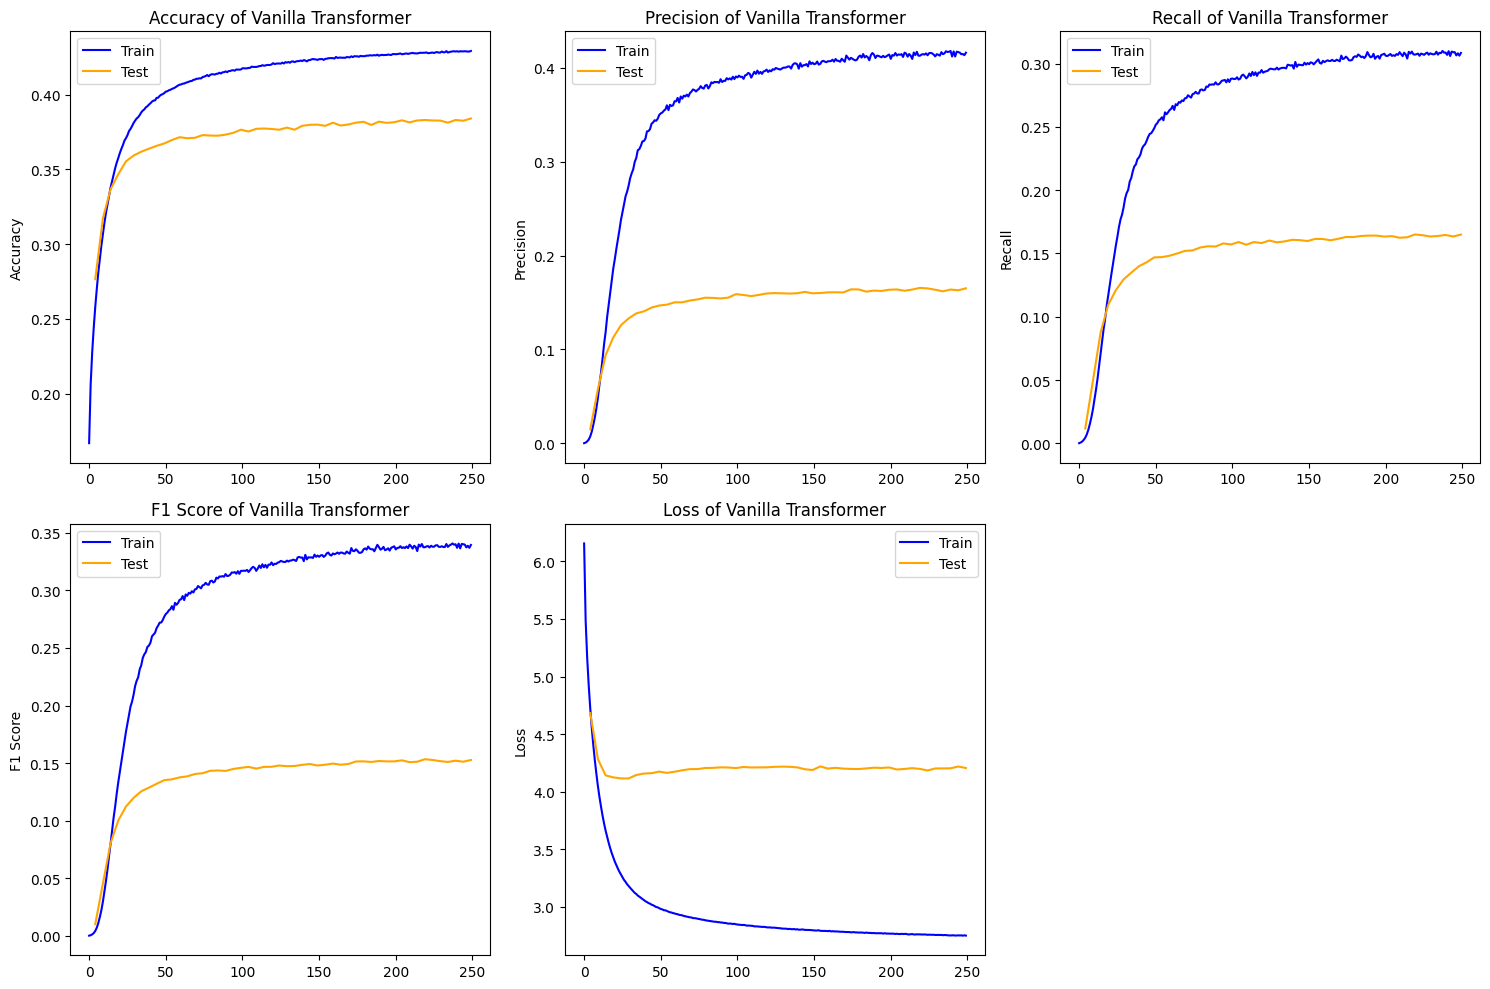

In [ ]:
train_df = pd.read_csv("/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Notebook/train_metrics_full.csv")
test_df = pd.read_csv("/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Notebook/test_metrics_every_5_epochs.csv")

def make_list(metric):
    if isinstance(metric, (float, int, np.float32, np.float64)):
        return [metric]
    return list(metric)

train_accuracy = make_list(train_df["train_acc"])
train_precision = make_list(train_df["train_precision"])
train_recall = make_list(train_df["train_recall"])
train_f1 = make_list(train_df["train_f1"])
train_loss = make_list(train_df["train_loss"])

test_accuracy = make_list(test_df["test_acc"])
test_precision = make_list(test_df["test_precision"])
test_recall = make_list(test_df["test_recall"])
test_f1 = make_list(test_df["test_f1"])
test_loss = make_list(test_df["test_loss"])

test_epochs = list(range(4, len(train_accuracy), 5))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(train_accuracy, label='Train', color='blue')
axs[0, 0].plot(test_epochs, test_accuracy, label='Test', color='orange')
axs[0, 0].set_title("Accuracy of Vanilla Transformer")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()

axs[0, 1].plot(train_precision, label='Train', color='blue')
axs[0, 1].plot(test_epochs, test_precision, label='Test', color='orange')
axs[0, 1].set_title("Precision of Vanilla Transformer")
axs[0, 1].set_ylabel("Precision")
axs[0, 1].legend()

axs[0, 2].plot(train_recall, label='Train', color='blue')
axs[0, 2].plot(test_epochs, test_recall, label='Test', color='orange')
axs[0, 2].set_title("Recall of Vanilla Transformer")
axs[0, 2].set_ylabel("Recall")
axs[0, 2].legend()

axs[1, 0].plot(train_f1, label='Train', color='blue')
axs[1, 0].plot(test_epochs, test_f1, label='Test', color='orange')
axs[1, 0].set_title("F1 Score of Vanilla Transformer")
axs[1, 0].set_ylabel("F1 Score")
axs[1, 0].legend()

axs[1, 1].plot(train_loss, label='Train', color='blue')
axs[1, 1].plot(test_epochs, test_loss, label='Test', color='orange')
axs[1, 1].set_title("Loss of Vanilla Transformer")
axs[1, 1].set_ylabel("Loss")
axs[1, 1].legend()

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Linear Transformer

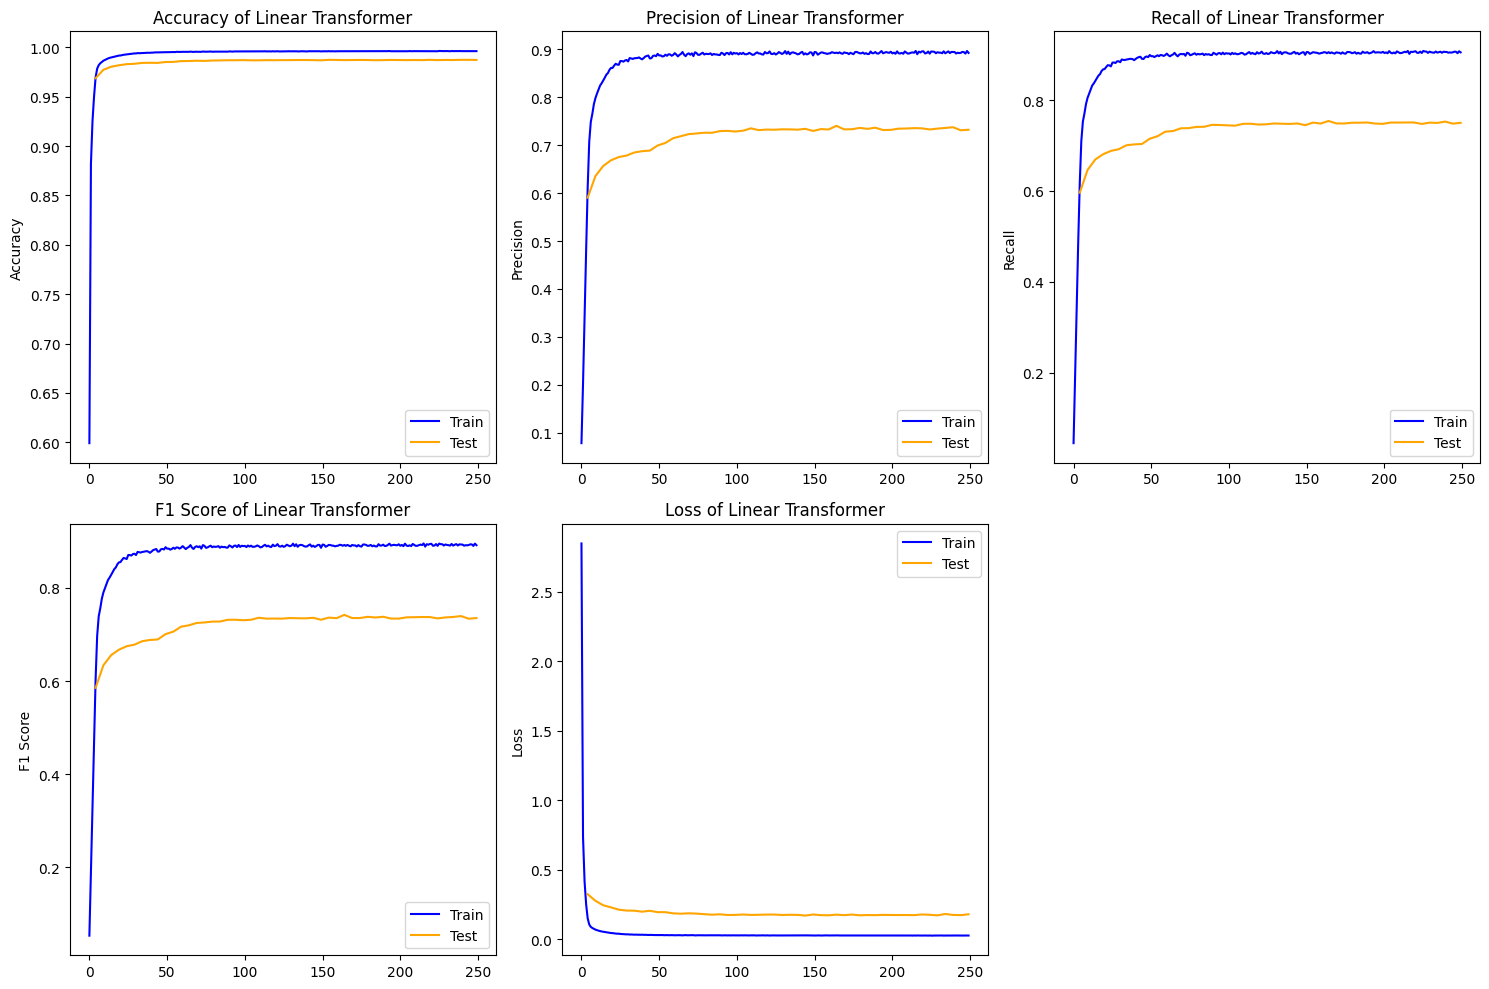

In [ ]:
train_df = pd.read_csv("/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Notebook/train_metrics_linear_transformer_correct.csv")
test_df = pd.read_csv("/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/Notebook/test_metrics_linear_transformer_correct.csv")

def make_list(metric):
    if isinstance(metric, (float, int, np.float32, np.float64)):
        return [metric]
    return list(metric)

train_accuracy = make_list(train_df["train_acc"])
train_precision = make_list(train_df["train_precision"])
train_recall = make_list(train_df["train_recall"])
train_f1 = make_list(train_df["train_f1"])
train_loss = make_list(train_df["train_loss"])

test_accuracy = make_list(test_df["test_acc"])
test_precision = make_list(test_df["test_precision"])
test_recall = make_list(test_df["test_recall"])
test_f1 = make_list(test_df["test_f1"])
test_loss = make_list(test_df["test_loss"])

test_epochs = list(range(4, len(train_accuracy), 5))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(train_accuracy, label='Train', color='blue')
axs[0, 0].plot(test_epochs, test_accuracy, label='Test', color='orange')
axs[0, 0].set_title("Accuracy of Linear Transformer")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()

axs[0, 1].plot(train_precision, label='Train', color='blue')
axs[0, 1].plot(test_epochs, test_precision, label='Test', color='orange')
axs[0, 1].set_title("Precision of Linear Transformer")
axs[0, 1].set_ylabel("Precision")
axs[0, 1].legend()

axs[0, 2].plot(train_recall, label='Train', color='blue')
axs[0, 2].plot(test_epochs, test_recall, label='Test', color='orange')
axs[0, 2].set_title("Recall of Linear Transformer")
axs[0, 2].set_ylabel("Recall")
axs[0, 2].legend()

axs[1, 0].plot(train_f1, label='Train', color='blue')
axs[1, 0].plot(test_epochs, test_f1, label='Test', color='orange')
axs[1, 0].set_title("F1 Score of Linear Transformer")
axs[1, 0].set_ylabel("F1 Score")
axs[1, 0].legend()

axs[1, 1].plot(train_loss, label='Train', color='blue')
axs[1, 1].plot(test_epochs, test_loss, label='Test', color='orange')
axs[1, 1].set_title("Loss of Linear Transformer")
axs[1, 1].set_ylabel("Loss")
axs[1, 1].legend()

axs[1, 2].axis('off')  

plt.tight_layout()
plt.show()


In [ ]:
from tensorboard.backend.event_processing import event_accumulator

log_file = "/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/src/main/runs/Linear_transformer/events.out.tfevents.1745211866.lambda-vector.3014491.2"

ea = event_accumulator.EventAccumulator(log_file)
ea.Reload()

print("Available scalar tags:")
print(ea.Tags().get('scalars', []))

for tag in ['validation/cer', 'validation/wer', 'validation/bleu']:
    if tag in ea.Tags()['scalars']:
        events = ea.Scalars(tag)
        print(f"\n{tag.upper()} values over steps:")
        for e in events:
            print(f"Step {e.step}: {e.value}")


Available scalar tags:
['validation/cer', 'validation/wer', 'validation/bleu']

VALIDATION/CER values over steps:
Step 5: 21.485713958740234
Step 10: 43.08571243286133
Step 15: 35.85714340209961
Step 20: 42.28571319580078
Step 25: 24.742856979370117
Step 30: 34.14285659790039
Step 35: 32.4571418762207
Step 40: 25.542856216430664
Step 45: 20.114286422729492
Step 50: 18.114286422729492
Step 55: 36.371429443359375
Step 60: 57.28571319580078
Step 65: 14.314285278320312
Step 70: 4.142857074737549
Step 75: 11.628571510314941
Step 80: 30.14285659790039
Step 85: 18.685714721679688
Step 90: 15.571428298950195
Step 95: 14.142857551574707
Step 100: 26.77142906188965
Step 105: 19.457143783569336
Step 110: 2.4000000953674316
Step 115: 14.342857360839844
Step 120: 2.6285715103149414
Step 125: 16.22857093811035
Step 130: 17.22857093811035

VALIDATION/WER values over steps:
Step 5: 28.22222137451172
Step 10: 28.22222137451172
Step 15: 28.22222137451172
Step 20: 28.22222137451172
Step 25: 28.2222213745

In [ ]:
from tensorboard.backend.event_processing import event_accumulator

log_file = "/home/careinfolab/Dr_Luo/Rohan/Linear_Attention/src/main/runs/vanilla_transformer/events.out.tfevents.1745237210.lambda-vector.3014706.2"

ea = event_accumulator.EventAccumulator(log_file)
ea.Reload()

print("Available scalar tags:")
print(ea.Tags().get('scalars', []))

for tag in ['validation/cer', 'validation/wer', 'validation/bleu']:
    if tag in ea.Tags()['scalars']:
        events = ea.Scalars(tag)
        print(f"\n{tag.upper()} values over steps:")
        for e in events:
            print(f"Step {e.step}: {e.value}")


Available scalar tags:
['validation/cer', 'validation/wer', 'validation/bleu']

VALIDATION/CER values over steps:
Step 5: 0.6857143044471741
Step 10: 0.6285714507102966
Step 15: 0.37142857909202576
Step 20: 3.2857143878936768
Step 25: 0.7428571581840515
Step 30: 0.9142857193946838
Step 35: 1.3714286088943481
Step 40: 0.6285714507102966
Step 45: 0.9428571462631226
Step 50: 0.6000000238418579
Step 55: 1.2285714149475098
Step 60: 0.7714285850524902
Step 65: 0.5714285969734192
Step 70: 0.8285714387893677
Step 75: 0.9428571462631226
Step 80: 0.37142857909202576
Step 85: 0.7428571581840515
Step 90: 0.4285714328289032
Step 95: 0.4000000059604645
Step 100: 0.4000000059604645
Step 105: 0.4285714328289032
Step 110: 0.2857142984867096
Step 115: 0.48571428656578064
Step 120: 0.2857142984867096
Step 125: 0.4000000059604645
Step 130: 0.37142857909202576
Step 135: 0.4000000059604645

VALIDATION/WER values over steps:
Step 5: 1.0
Step 10: 0.6666666865348816
Step 15: 0.5555555820465088
Step 20: 3.66666

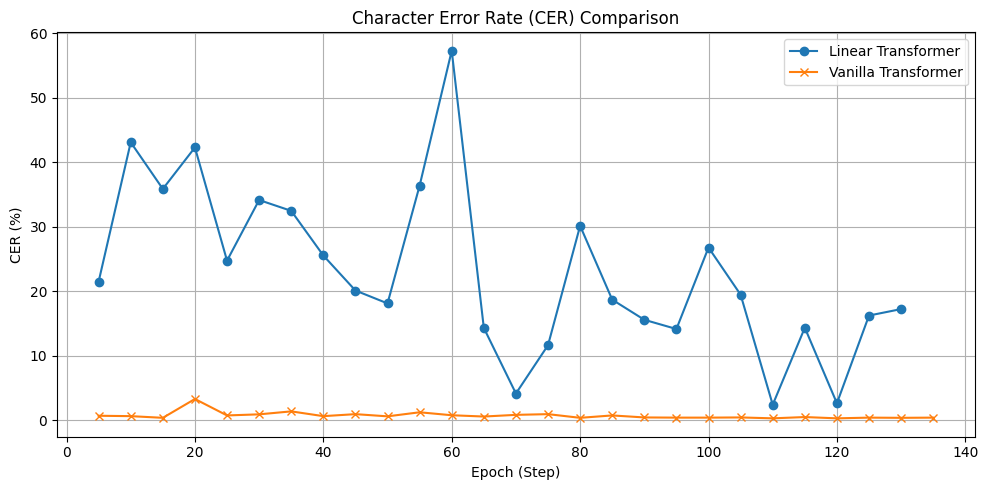

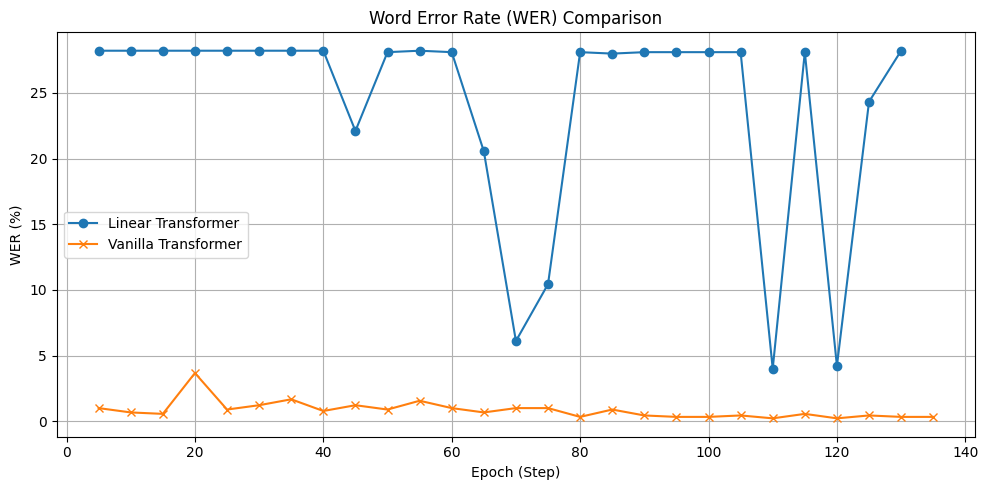

In [ ]:
import matplotlib.pyplot as plt

steps_linear = list(range(5, 135, 5))  
steps_vanilla = list(range(5, 140, 5))[:27] 

cer_linear = [
    21.49, 43.09, 35.86, 42.29, 24.74, 34.14, 32.46, 25.54, 20.11, 18.11,
    36.37, 57.29, 14.31, 4.14, 11.63, 30.14, 18.69, 15.57, 14.14, 26.77,
    19.46, 2.40, 14.34, 2.63, 16.23, 17.23
]

wer_linear = [
    28.22, 28.22, 28.22, 28.22, 28.22, 28.22, 28.22, 28.22, 22.11, 28.11,
    28.22, 28.11, 20.56, 6.11, 10.44, 28.11, 28.0, 28.11, 28.11, 28.11,
    28.11, 4.0, 28.11, 4.22, 24.33, 28.22
]

cer_vanilla = [
    0.69, 0.63, 0.37, 3.29, 0.74, 0.91, 1.37, 0.63, 0.94, 0.60,
    1.23, 0.77, 0.57, 0.83, 0.94, 0.37, 0.74, 0.43, 0.40, 0.40,
    0.43, 0.29, 0.49, 0.29, 0.40, 0.37, 0.40
]

wer_vanilla = [
    1.0, 0.67, 0.56, 3.67, 0.89, 1.22, 1.67, 0.78, 1.22, 0.89,
    1.56, 1.0, 0.67, 1.0, 1.0, 0.33, 0.89, 0.44, 0.33, 0.33,
    0.44, 0.22, 0.56, 0.22, 0.44, 0.33, 0.33
]

plt.figure(figsize=(10, 5))
plt.plot(steps_linear, cer_linear, label="Linear Transformer", marker='o')
plt.plot(steps_vanilla, cer_vanilla, label="Vanilla Transformer", marker='x')
plt.title("Character Error Rate (CER) Comparison")
plt.xlabel("Epoch (Step)")
plt.ylabel("CER (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cer_comparison.png")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(steps_linear, wer_linear, label="Linear Transformer", marker='o')
plt.plot(steps_vanilla, wer_vanilla, label="Vanilla Transformer", marker='x')
plt.title("Word Error Rate (WER) Comparison")
plt.xlabel("Epoch (Step)")
plt.ylabel("WER (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("wer_comparison.png")
plt.show()
